## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
# read th datset
df = pd.read_csv('ab_data.csv')
#  inspect some lines
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


Timestamp seems to be problematic as it is of type object (string). I leav eit for the moment.

b. Use the below cell to find the number of rows in the dataset.

In [5]:
print('Number of records: {}'.format(df.shape[0]))

Number of records: 294478


c. The number of unique users in the dataset.

In [6]:
print('Unique number of User IDs: {}'.format(df['user_id'].nunique()))

Unique number of User IDs: 290584


d. The proportion of users converted.

In [7]:
# Let's count the # of converted unique users and calculate the overall proportion
number_converted = df.query('converted == "1"')['user_id'].nunique() / df['user_id'].nunique()

In [8]:
print('Proportion of users converted: {}%'.format(number_converted*100))

Proportion of users converted: 12.104245244060237%


e. The number of times the `new_page` and `treatment` don't line up.

In [9]:
# look to th edifferent instances of grouo and landing page
df.groupby(['landing_page','group']).nunique()['user_id']

landing_page  group    
new_page      control        1928
              treatment    145310
old_page      control      145274
              treatment      1965
Name: user_id, dtype: int64

In [10]:
# so obviously the new_page needs to be visited by the group treatment group
# and the old page needs to be visited by the control group.

df.query('landing_page == "new_page" and group == "control"').nunique()['user_id'] +\
df.query('landing_page == "old_page" and group == "treatment"').nunique()['user_id']

3893

f. Do any of the rows have missing values?

In [11]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

No values missing.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
# so implicitly get rid of the lines from 1e by selecting the data frame only for the correct aligned combinations 
df2 = df[((df['group']=='treatment') & (df['landing_page']=='new_page')) \
         | ((df['group']=='control') & (df['landing_page']=='old_page'))]

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
print('Unique number of User IDs (df2): {}'.format(df2['user_id'].nunique()))

Unique number of User IDs (df2): 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
# https://stackoverflow.com/questions/50242968/check-for-duplicate-values-in-dataframe-column
#df2[df2['user_id'].duplicated()]['user_id']
print('The User ID is: {}'.format(df2[df2['user_id'].duplicated()]['user_id']))

The User ID is: 2893    773192
Name: user_id, dtype: int64


c. What is the row information for the repeat **user_id**? 

In [16]:
# https://stackoverflow.com/questions/50242968/check-for-duplicate-values-in-dataframe-column
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [18]:
# use pandas drop_duplicates
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
# Drop one of the records which are duplicated by 
df2 = df2.drop_duplicates(subset = 'user_id')

In [19]:
df2.info() # one less :-)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
df.groupby(['converted']).nunique()['user_id']

converted
0    256275
1     35173
Name: user_id, dtype: int64

In [21]:
# simply take the mean (p = proportion) of the attribute converted as it has as possible values 1 and 0.
df2['converted'].mean()
print('The probability of an individual converting is: {}'.format(df2['converted'].mean()))

The probability of an individual converting is: 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
df2.query('group == "control"')['converted'].mean()
print('The probability of an individual (Control) converting is: {}' \
      .format(df2.query('group == "control"')['converted'].mean()))

The probability of an individual (Control) converting is: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
df2.query('group == "treatment"')['converted'].mean()
print('The probability of an individual (Treatment) converting is: {}' \
      .format(df2.query('group == "treatment"')['converted'].mean()))

The probability of an individual (Treatment) converting is: 0.11880806551510564


d. What is the probability that an individual received the new page?

In [24]:
# calculate the proportion of the attribute landing_page == "new_page" in conjunction with the overall unique users
prop_newpage = df2[df2['landing_page'] == 'new_page'].nunique()['user_id'] / df2['user_id'].nunique()

print('The proportion of the attribute landing_page == "new_page" is: {}' \
      .format(prop_newpage))

The proportion of the attribute landing_page == "new_page" is: 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Based on the results above, it seems that the control group has a slightly higher conversion rate, as of 0,1204, compared to the treatment group, which has 0,1195. Outstanding for now is the statistically proof of significance. As a logical next step we need to define the A/B test with the respective Null and Alternative Hypothethis, which the observed values will be reconciled by bootstrapping the sample and calculate the p-Value to infer statistical signifance. As well we don't know at the moment if there are factors like novelty effect and change aversion are existent. Important here is as well Sufficient traffic and conversions to have significant and repeatable results.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$p_{old}$ and $p_{new}$ are the proportions of the convertion rates of the old and new pages. 

* The Null Hypothetis ($H_{0}$) states that new page has either same coversion rate or worse than old page.

* The Alternative Hypothetis ($H_{1}$) states new page has better conversion rate than old page.

Mathematical Hypothethis Declaration:

**$H_{0}$ : $p_{new}$ - $p_{old}$ <= 0        
  $H_{1}$ : $p_{new}$ - $p_{old}$ > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [25]:
# So according to the assumptions in question 2. The P_New and P_Old are equal across both pages and can be derived 
# from the dataset intially loaded (ab_data.csv) which has bejng "massaged" a bit and is available in data frame df2.
# Calculating propotion of users that converted using new page.

p_new = df2['converted'].mean()
print("Convertion rate p_new: {}".format(p_new))

Convertion rate p_new: 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [26]:
# The P_New and P_Old are equal according to the assumptions 
p_old = p_new
print("Convertion rate p_old: {}".format(p_old))

Convertion rate p_old: 0.11959708724499628


c. What is $n_{new}$?

In [27]:
# I assume n refers to the number of users related to the new page.
n_new = df2.query("group == 'treatment'")['user_id'].nunique()
print("New page users (n_new): {}".format(n_new))

New page users (n_new): 145310


d. What is $n_{old}$?

In [29]:
# I assume n refers to the number of users related to the old page.
n_old = df2.query("group == 'control'")['user_id'].nunique()
print("Old page users (n_old): {}".format(n_old))

Old page users (n_old): 145274


In [34]:
(1-n_old/n_new)*100

0.024774619778400453

I'm not so sure if the different sample size of old and new matters, but the difference is very small ~ 0,02%. So I neglect that fact.

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [38]:
# so now simulate a distribution based on the number we have calculated, mainly to be used in later bootstrap...
# 1 and 0 for converted and not converted
# the distribution size 
# the probability for converting and not converting
new_page_converted = np.random.choice([0, 1], size = n_new, p = [p_new, 1 - p_new])
new_page_converted

array([1, 0, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [39]:
#  same as above for old pagers
old_page_converted = np.random.choice([0, 1], size = n_old, p = [p_old, 1 - p_old])
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [41]:
# simply substract the means
p_new_old_diff = new_page_converted.mean() - old_page_converted.mean()
p_new_old_diff

-0.0004455520005426372

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [42]:
# now bootstrap 10000 times to prepare the validation
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size = n_new, p = [p_new, 1 - p_new]).mean()
    old_page_converted = np.random.choice([0, 1], size = n_old, p = [p_old, 1 - p_old]).mean()
    p_diffs.append(new_page_converted - old_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

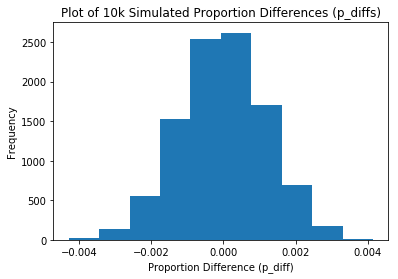

In [58]:
# plot the simulated data along with the sample proportion difference
plt.hist(p_diffs);
plt.ylabel('Frequency')
plt.xlabel('Proportion Difference (p_diff)')
plt.title('Plot of 10k Simulated Proportion Differences (p_diffs)');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [69]:
# normally the sample difference was calucated far in teh beginning, based on teh exercise assumptions anf flow of
# questions we need to do it now.
observed_diff = df[df['group'] == 'treatment']['converted'].mean() -  \
           df[df['group'] == 'control']['converted'].mean()
observed_diff

-0.0014795997940775518

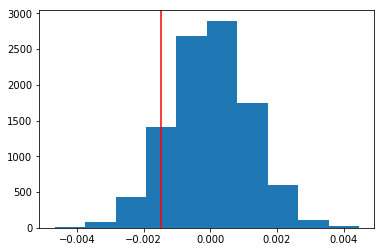

In [70]:
# transform to a numpy array
p_diffs = np.array(p_diffs)

# simulate the distribution under the null hypothesis with mean 0 and the std and length of the
# bootstrapped simulation  
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

#Plot Null distribution
plt.hist(null_vals)
#Plot vertical line for observed statistic
plt.axvline(x=observed_diff,color ='red');

In [72]:
# now compute the p-value by finding the proportion of values
# in the null distribution that were greater than our current observed difference.
(null_vals > current_diff).mean()

0.8966

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We calculated the p-value. The p-value is the probability of getting our statistic or a more extreme value if the null is true. Therefore, small p-values suggest our null is not true. Rather, our statistic is likely to have come from a different distribution than the null.
When the p-value is large, we have evidence that our statistic was likely to come from the null hypothesis. Therefore, we do not have evidence to reject the null.**      
*Source: UDACITY Data Analyst Nanidegree - Chapter "Practical Statistics - Hypothetis Testing"*

**For the A/B test here teh question was if the old or teh new page is better, this was formulated like this:**

**$H_{0}$ : $p_{new}$ - $p_{old}$ <= 0        
  $H_{1}$ : $p_{new}$ - $p_{old}$ > 0**
  
**So the p-Value calucated of 0,8966 is very large (also greate as the Error I threshold (α = 0,05). This gives us an evidence that the value we observed is coming from the distribution under the null hypothethis and we can't reject the null hypothethis. So the recommendation is to stay with the old web page.**



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [84]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control'")['converted'].sum()
convert_new = df2.query("group == 'treatment'")['converted'].sum()
n_old = df2.query("group == 'control'")['user_id'].count()
n_new = df2.query("group == 'treatment'")['user_id'].count()

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [89]:
# the link above wan't working so I used that one 
# https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html
# count and nobs are clear altrnative --> smaller means that the alternative hypothesis is prop < value 
count = [convert_old, convert_new]
nobs  = [n_old, n_new]
z_score, p_value = sm.stats.proportions_ztest(count, nobs, alternative = 'smaller')
print('Z-Score: {} and P-Value: {}'.format(z_score, p_value))

Z-Score: 1.3109241984234394 and P-Value: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**We calculate a Z-Score of 1,31 and a P-Value of 0,91 (both values rounded to 2 decimals). The Z-Score defines if the null hypothesis is in the rejection region (in our example the right outer area from the 95% confidence interval). We have alpha as 5% which translates in a Z-Score if 1,96. If the calculated Z-Score would be more significant, then the null hypothesis can be rejected, which isn't the case (1,96 > 1,31). Furthermore, the p-value is very similar to the one we "bootstrapped".  The rounded p-value (of 0,8966) is 0,90 and therefore very same to the P-Value calculated traditionally,  0,91. So all assumptions made in j and k hold.**

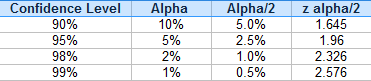




*Source: https://www.statisticshowto.datasciencecentral.com/z-test/*


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [ ]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [ ]:
### Create the necessary dummy variables

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [ ]:
### Fit Your Linear Model And Obtain the Results

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.